# Comparison of SemmedDB and Mark2Cure concept pair (and relationship) types

This notebook compares the concept pairings in SemmedDB and Mark2Cure (for only completed Mark2Cure concept pairs in which a majority of users determined that 1. neither concepts in the pair are broken, and 2. there is some sort of relationship between the concepts. Info on SemmedDB semantic types can be found at: https://metamap.nlm.nih.gov/SemanticTypesAndGroups.shtml

## Import modules and data

In [1]:
import pandas
import matplotlib
from matplotlib import pyplot as mplot
from pandas import read_csv

Import the merged semmedDb and Mark2Cure data

In [2]:
savepath = 'data/'
exppath = 'results/'

### Import the merged results of SemmedDB and Mark2Cure
semmed_merged = pandas.read_csv(exppath+'semmed_merged.txt',delimiter='\t',header=0)
semmed_merged.drop('Unnamed: 0',axis=1, inplace=True)

### Import the Semmed relationships where both subject and object are in M2C
constrained_semmed_mesh = pandas.read_csv(exppath+'constrained_semmed_mesh.txt',delimiter='\t',header=0)
constrained_semmed_mesh.drop('Unnamed: 0',axis=1, inplace=True)

### Import the Mark2Cure Majority-ruled results
majority_result = pandas.read_csv(exppath+'majority_result.txt',delimiter='\t',header=0)
majority_result.drop('Unnamed: 0',axis=1, inplace=True)

print(semmed_merged.head(n=2))

  SUBJECT_NAME    PREDICATE    OBJECT_NAME     PMID SUBJECT_CUI  \
0     Membrane  LOCATION_OF  Cytochromes b  3305576    C0596901   
1  granulocyte      PART_OF          Human  3305576    C0018183   

  SUBJECT_SEMTYPE OBJECT_CUI OBJECT_SEMTYPE  PREDICATION_ID  SENTENCE_ID  \
0            celc   C0010744           aapp         7613702     15005034   
1            cell   C0020114           humn         7613765     15005153   

   SUBJECT_NOVELTY  OBJECT_NOVELTY SUBJECT_M2C_TYPE OBJECT_M2C_TYPE  \
0                1               1             celc            gene   
1                1               1             cell            humn   

  SUBJECT_ID OBJECT_ID  
0   notfound   D045303  
1    D006098  notfound  


### Codes for semantic types of interest. 
Disease code types were based on those selected for the NCBI disease corpus.

In [3]:
## disease codes based on the ones selected for disease corpus
disease_codes = {
    'acab':'T020|Acquired Abnormality',
    'anab':'T190|Anatomical Abnormality',
    'cgab':'T019|Congenital Abnormality',
    'comd':'T049|Cell or Molecular Dysfunction',
    'dsyn':'T047|Disease or Syndrome',
    'emod':'T050|Experimental Model of Disease',
    'inpo':'T037|Injury or Poisoning',
    'mobd':'T048|Mental or Behavioral Dysfunction',
    'neop':'T191|Neoplastic Process',
    'patf':'T046|Pathologic Function',
    'sosy':'T184|Sign or Symptom',
    'fndg':'T033|Finding'
}

gene_codes = {
    'aapp':'T116|Amino Acid, Peptide, or Protein',
    'enzy':'T126|Enzyme',
    'gngm':'T028|Gene or Genome'
}

treatment_codes = {
    'chem':'T103|Chemical',
    'chvf':'T120|Chemical Viewed Functionally',
    'chvs':'T104|Chemical Viewed Structurally',
    'clnd':'T200|Clinical Drug',
    'drdd':'T203|Drug Delivery Device',
    'eico':'T111|Eicosanoid',
    'hops':'T131|Hazardous or Poisonous Substance',
    'horm':'T125|Hormone',
    'inch':'T197|Inorganic Chemical',
    'medd':'T074|Medical Device',
    'phsu':'T121|Pharmacologic Substance',
    'sbst':'T167|Substance',
    'shro':'T095|Self-help or Relief Organization ',
    'topp':'T061|Therapeutic or Preventive Procedure ',
    'nsba':'T124|Neuroreactive Substance or Biogenic Amine',
    'vita':'T127|Vitamin',
    'bacs':'T123|Biologically Active Substance', 
    'carb':'T118|Carbohydrate', 
    'orch':'T109|Organic Chemical'
}

In [4]:
semantic_types = list(disease_codes.keys())+list(gene_codes.keys())+list(treatment_codes.keys())
print(semantic_types)

['neop', 'emod', 'dsyn', 'cgab', 'anab', 'mobd', 'inpo', 'patf', 'acab', 'sosy', 'fndg', 'comd', 'aapp', 'gngm', 'enzy', 'orch', 'clnd', 'inch', 'hops', 'carb', 'chvf', 'phsu', 'nsba', 'vita', 'sbst', 'chem', 'medd', 'shro', 'topp', 'drdd', 'bacs', 'horm', 'eico', 'chvs']


## Analyze the concepts & relations in common and different between Mark2Cure and SemmedDB

The mappings between SemmedDB and Mark2Cure will be based on the identifiers for the concept. Since we don't bother converting UMLS IDs to MeSH IDs for concepts that are outside of the Mark2Cure semantic type (eg- cell lines, species, etc) and because concepts outside the Mark2Cure semantic type should not map to Mark2Cure concepts, we reduce the number of SemmedDB annotations to analyze by filtering for only annotations where the SemmedDB concepts are within the Mark2Cure semantic types (eg- genes, treatments, diseases)

Since SemmedDB tokenizes at the sentence level, it's possible for a concept pair in Mark2Cure to be spread across different annotations in SemmedDB. To ensure that we don't lose those, we'll need to look at the appearance of individual members of a concept pair in each pmid, and not just the entire concept pair.

To do that, we first pull the pmids from the SemmedDB annotations where BOTH concepts appear in Mark2Cure.  Then we use the pmids to pull the relationships that Mark2Cure annotators completed.

In [5]:
## Pull the pmids from the semmed db relations where both concepts appear in Mark2Cure
constrained_pmids = constrained_semmed_mesh['PMID'].unique().tolist()
print('Number of PMIDs which have semmed relations where both concepts are in M2C: ',len(constrained_pmids))
## Use the pmids to pull the relationships that Mark2Cure annotators completed
m2c_semmed_subset = majority_result.loc[majority_result['pmid'].isin(constrained_pmids)]
print('Number of relationships in PMIDs, with SEMMED relationships on concepts in M2C: ',len(m2c_semmed_subset))

#print(m2c_semmed_subset.head(n=2))
#print(constrained_pmids)

Number of PMIDs which have semmed relations where both concepts are in M2C:  55
Number of relationships in PMIDs, with SEMMED relationships on concepts in M2C:  402


Filter the SemmedDB (with MeshIDs) merged/mapped result by Mark2Cure semantic type.  Do an outer merge of the new filtered SemmedDB with Mesh IDs with the Mark2Cure annotations that have been constrained by PMIDs where M2C and Semmed have concepts in common in order to get the union. This will allow us to identify the concept pairs that are unique to SemmedDB, unique to Mark2Cure, or overlap between the two.

In [6]:
test_pmid_set =[8006362, 10420116, 16098009]
print('unfiltered: ',len(semmed_merged))
filtered_semmed_mesh = semmed_merged.loc[semmed_merged['PMID'].isin(constrained_pmids)&
                                        (semmed_merged['SUBJECT_SEMTYPE'].isin(semantic_types))&
                                        (semmed_merged['OBJECT_SEMTYPE'].isin(semantic_types))].copy()
filtered_semmed_mesh['concept_pair'] = filtered_semmed_mesh['SUBJECT_ID'].astype(str).str.cat(filtered_semmed_mesh['OBJECT_ID'].astype(str),sep='_x_')
filtered_semmed_mesh.replace({'SUBJECT_M2C_TYPE':{'gene':'g', 'disease':'d','treatment':'c'},
                              'OBJECT_M2C_TYPE':{'gene':'g', 'disease':'d','treatment':'c'}}, inplace=True)
filtered_semmed_mesh['reltype'] = filtered_semmed_mesh['SUBJECT_M2C_TYPE'].astype(str).str.cat(filtered_semmed_mesh['OBJECT_M2C_TYPE'].astype(str),sep='_')
filtered_semmed_mesh.drop('SENTENCE_ID', axis=1, inplace=True)
print('filtered: ',len(filtered_semmed_mesh))
#print(filtered_semmed_mesh.head(n=2))
m2c_tmp = m2c_semmed_subset.copy()
#m2c_tmp = majority_result.copy()
m2c_tmp.rename(columns={'pmid':'PMID'}, inplace=True)
m2c_tmp.drop(['user_count','relation_count','test_completions'],axis=1,inplace=True)
#print(m2c_tmp.head(n=2))

M2C_semmed_all_merge = m2c_tmp.merge(filtered_semmed_mesh, on=('PMID','reltype','concept_pair'), how='outer').fillna('not found')
M2C_semmed_all_merge['PMID']=M2C_semmed_all_merge['PMID'].astype(int)
M2C_semmed_all_merge.sort_values(['PMID','concept_pair'],ascending=[True,True],inplace=True)
#print(M2C_semmed_all_merge.loc[M2C_semmed_merge['OBJECT_CUI']!='not found'].head(n=2))
print(len(M2C_semmed_all_merge))
#M2C_semmed_all_merge.to_csv(exppath+'M2C_semmed_all_merge.txt',sep='\t',header=True)

unfiltered:  1555
filtered:  260
657


Discard concept pairs that users marked as broken and 'not related', prior to summarizing and generating the plots

In [7]:
#print(M2C_semmed_all_merge.head(n=2))
#### Drop the annotations users marked as broken
M2C_semmed_merge_nb = M2C_semmed_all_merge.loc[(M2C_semmed_all_merge['evtype']!='c_1_broken')&(M2C_semmed_all_merge['evtype']!='c_1_broken')]
print('relations left after broken concepts removed: ',len(M2C_semmed_merge_nb))
#print(M2C_semmed_merge_nb.head(n=2))

M2C_semmed_merge = M2C_semmed_merge_nb.loc[~M2C_semmed_merge_nb['evtype'].str.contains('no relation')]
print('relations left after unrelated concepts removed: ',len(M2C_semmed_merge))
#print(M2C_semmed_merge.head(n=2))

relations left after broken concepts removed:  600
relations left after unrelated concepts removed:  566


## Visualize the results

Create a heatmap to compare the relationships in Mark2Cure vs SemmedDB where each row is a PMID and the columns are the number of relationships in semmeddb that are g-g, g-d (or d-g), g-c(or c-g), d-d, c-c, c-d (or d-c). Do the same for M2C, number of relations that are g-d, g-c, or c-d, and the relations in common between Mark2Cure and SemmedDB.

To start, format the results for ease of analysis and plotting

In [8]:
M2C_semmed_merge['reltype_cat'] = 'missing_data'
M2C_semmed_merge.loc[(M2C_semmed_merge['refid1']=='not found')&(M2C_semmed_merge['refid2']=='not found'),'reltype_cat']='semmed_only'
M2C_semmed_merge.loc[(M2C_semmed_merge['refid1']!='not found')&(M2C_semmed_merge['refid2']=='not found'),'reltype_cat']='semmed_only'
M2C_semmed_merge.loc[(M2C_semmed_merge['refid1']=='not found')&(M2C_semmed_merge['refid2']!='not found'),'reltype_cat']='semmed_only'
M2C_semmed_merge.loc[(M2C_semmed_merge['SUBJECT_M2C_TYPE']=='not found')&(M2C_semmed_merge['OBJECT_M2C_TYPE']=='not found'),'reltype_cat']='M2C_only'
M2C_semmed_merge.loc[(M2C_semmed_merge['SUBJECT_M2C_TYPE']!='not found')&(M2C_semmed_merge['OBJECT_M2C_TYPE']=='not found'),'reltype_cat']='M2C_only'
M2C_semmed_merge.loc[(M2C_semmed_merge['SUBJECT_M2C_TYPE']=='not found')&(M2C_semmed_merge['OBJECT_M2C_TYPE']!='not found'),'reltype_cat']='M2C_only'
M2C_semmed_merge.loc[(M2C_semmed_merge['SUBJECT_M2C_TYPE']!='not found')&(M2C_semmed_merge['OBJECT_M2C_TYPE']!='not found')&
                     (M2C_semmed_merge['refid1']!='not found')&(M2C_semmed_merge['refid2']!='not found'),'reltype_cat']='both'


C:\Users\ginger\Anaconda3\envs\py3bioc\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\ginger\Anaconda3\envs\py3bioc\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Get the counts of each relationship type per PMID

In [9]:
relation_type_counts = M2C_semmed_merge.groupby(['PMID','reltype','reltype_cat']).size().reset_index(name = 'counts')

#print(relation_type_counts.head(n=10))
#print(relation_type_counts.loc[relation_type_counts['reltype_cat']=='both'])

Rearrange the dataframe to be categorical by PMID

In [9]:
semmed_table = []
m2c_table = []
both_table = []
#for eachpmid in (8006362,10420116,11404002):
for eachpmid in relation_type_counts['PMID'].unique().tolist():
    tmpdf = relation_type_counts.loc[relation_type_counts['PMID']==eachpmid]
    tmpsemdict = {'PMID':eachpmid,'c_c':0,'g_g':0,'d_d':0,'c_g':0,'g_c':0,'g_d':0,'d_g':0,'c_d':0,'d_c':0}
    tmpm2cdict = {'PMID':eachpmid,'c_g':0,'g_c':0,'g_d':0,'d_g':0,'c_d':0,'d_c':0}
    tmpbothdict = {'PMID':eachpmid,'c_g':0,'g_c':0,'g_d':0,'d_g':0,'c_d':0,'d_c':0}
    if len(tmpdf.loc[tmpdf['reltype_cat']=='M2C_only'])!=0: ## if there are m2c only entries
        m2ctypes = tmpdf.loc[tmpdf['reltype_cat']=='M2C_only']
        for eachm2ctype in m2ctypes['reltype'].tolist():
            tmpm2cdict[eachm2ctype] = m2ctypes['counts'].loc[m2ctypes['reltype']==eachm2ctype].iloc[0]
        m2c_table.append(tmpm2cdict)
    else:
        m2c_table.append(tmpm2cdict)
    if len(tmpdf.loc[tmpdf['reltype_cat']=='semmed_only'])!=0: ##there are semmed only entries
        semtypes = tmpdf.loc[tmpdf['reltype_cat']=='semmed_only']
        for eachsemtype in semtypes['reltype'].tolist():
            tmpsemdict[eachsemtype] = semtypes['counts'].loc[semtypes['reltype']==eachsemtype].iloc[0]
        semmed_table.append(tmpsemdict)
    else:
        semmed_table.append(tmpsemdict)
    if len(tmpdf.loc[tmpdf['reltype_cat']=='both'])!=0: ## relationship exists in both M2C and semmed db
        bothtypes = tmpdf.loc[tmpdf['reltype_cat']=='both']
        for eachbothtype in bothtypes['reltype'].tolist():                     
            tmpbothdict[eachbothtype] = bothtypes['counts'].loc[bothtypes['reltype']==eachbothtype].iloc[0]
        both_table.append(tmpbothdict)
    else:
        both_table.append(tmpbothdict)     


In [10]:
####Check point: Confirm the M2C Maximum:
#print(pandas.DataFrame(m2c_table))
#print(relation_type_counts.loc[relation_type_counts['PMID']==22538409])
#print(M2C_semmed_merge.loc[M2C_semmed_merge['PMID']==22538409])

For ease of plotting split the SemmedDB-specific concept pairs from the M2C-specific concept pairs and the concept pairs in common

In [ ]:
semmed_hm_df = pandas.DataFrame(semmed_table)
m2c_hm_df = pandas.DataFrame(m2c_table)
both_hm_df = pandas.DataFrame(both_table)

Because it is possible for the concept pairs to be arranged in two directions in SemmedDB, reduce the directionalities of the heterogeneous concept type (heterotype) relationships for ease of comparison.

In [11]:
m2c_hm_df['g_c_c_g'] = m2c_hm_df['g_c']+m2c_hm_df['c_g']
m2c_hm_df['g_d_d_g'] = m2c_hm_df['g_d']+m2c_hm_df['d_g']
m2c_hm_df['d_c_c_d'] = m2c_hm_df['d_c']+m2c_hm_df['c_d']
m2c_hm_df.drop(['g_c','g_d','c_g','d_g','d_c','c_d'],axis=1,inplace=True)
m2c_hm_df.rename(columns = {'g_c_c_g':'c_g','g_d_d_g':'g_d','d_c_c_d':'c_d'}, inplace=True)

semmed_hm_df['g_c_c_g'] = semmed_hm_df['g_c']+semmed_hm_df['c_g']
semmed_hm_df['g_d_d_g'] = semmed_hm_df['g_d']+semmed_hm_df['d_g']
semmed_hm_df['d_c_c_d'] = semmed_hm_df['d_c']+semmed_hm_df['c_d']
semmed_hm_df.drop(['g_c','g_d','c_g','d_g','d_c','c_d'],axis=1,inplace=True)
semmed_hm_df.rename(columns = {'g_c_c_g':'c_g','g_d_d_g':'g_d','d_c_c_d':'c_d'}, inplace=True)

both_hm_df['g_c_c_g'] = both_hm_df['g_c']+both_hm_df['c_g']
both_hm_df['g_d_d_g'] = both_hm_df['g_d']+both_hm_df['d_g']
both_hm_df['d_c_c_d'] = both_hm_df['d_c']+both_hm_df['c_d']
both_hm_df.drop(['g_c','g_d','c_g','d_g','d_c','c_d'],axis=1,inplace=True)
both_hm_df.rename(columns = {'g_c_c_g':'c_g','g_d_d_g':'g_d','d_c_c_d':'c_d'}, inplace=True)

semmed_hom_df = semmed_hm_df[['PMID','c_c','d_d','g_g']].copy()
semmed_het_df = semmed_hm_df[['PMID','c_g','g_d','c_d']].copy()

print(both_hm_df.head(n=2))
print(m2c_hm_df.head(n=2))

      PMID  c_g  g_d  c_d
0  4075537    0    0    0
1  8006362    0    0    0
      PMID  c_g  g_d  c_d
0  4075537    0    6    0
1  8006362    0    0    0


The heatmap intensity will depend on the maximum of the maximum number of each relationship type per pmid per data source, so determine the absolute max value

In [12]:
#### maximum values for setting the alphas in the heatmap
semmed_max = (semmed_hm_df[['c_c','g_g','d_d','c_g','g_d','c_d']].max()).max()
m2c_max = (m2c_hm_df[['c_g','g_d','c_d']].max()).max()
both_max = (both_hm_df[['c_g','g_d','c_d']].max()).max()
absolute_max = max(semmed_max,m2c_max,both_max)
print(absolute_max)

20


In [13]:
print(m2c_hm_df.head(n=2))

      PMID  c_g  g_d  c_d
0  4075537    0    6    0
1  8006362    0    0    0


Generate the heatmap

C:\Users\ginger\Anaconda3\envs\py3bioc\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


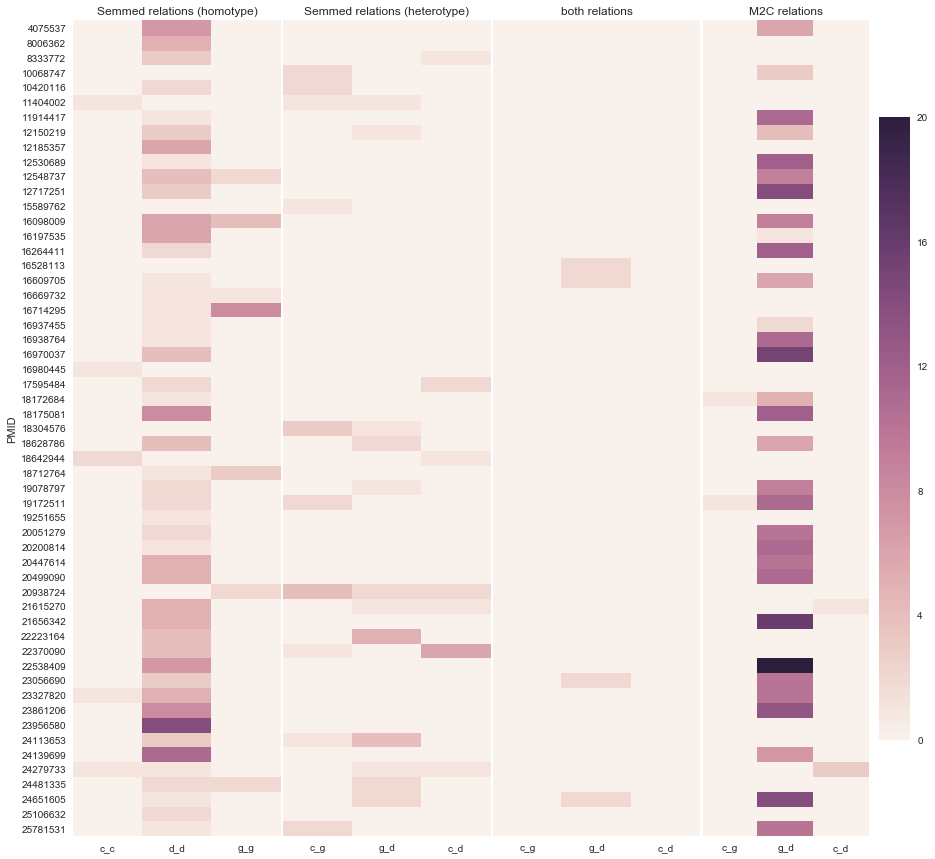

In [14]:
import seaborn as sns; sns.set()

f = mplot.figure(figsize=(15,15))


ax = mplot.subplot(1,4,1)
ax = sns.heatmap(semmed_hom_df.set_index('PMID'), vmin=0, vmax=20, yticklabels=True, cbar=False)
ax.yaxis.set_visible(True)
mplot.title('Semmed relations (homotype)')

ax2 = mplot.subplot(1,4,2)
ax2 = sns.heatmap(semmed_het_df.set_index('PMID'), vmin=0, vmax=20, yticklabels=False, cbar=False)
ax2.yaxis.set_visible(False)
mplot.title('Semmed relations (heterotype)')

ax3 = mplot.subplot(1,4,3)
ax3 = sns.heatmap(both_hm_df.set_index('PMID'), vmin=0, vmax=20, yticklabels=False, cbar=False)
ax3.yaxis.set_visible(False)
mplot.title('both relations')

ax4 = mplot.subplot(1,4,4)
ax4 = sns.heatmap(m2c_hm_df.set_index('PMID'), vmin=0, vmax=20, yticklabels=False,cbar=True)
ax4.yaxis.set_visible(False)
mplot.title('M2C relations')



f.subplots_adjust(wspace=0.01)
mplot.show(f)



### Aggregate and Transform the heatmap into a simplified plot to display the difference between M2C & SemmedDB
Aggregate the number of homotype relationships and heterotype relationships per PMID and calculate the total number of relationships per pmid for SemmedDB-specific concept pairs and Mark2Cure-specific concept pairs. Plot the ratio of homotype relationships to pmids vs the number of total relationships to pmids. Same with the number of heterotype relationship to pmids vs total relationships to pmids. 

First, deal with the unmapped concepts since obtaining counts using 'groupby' and size will not be accurate if grouping by concepts with no identifier.

In [ ]:
constrained_results = M2C_semmed_merge.loc[M2C_semmed_merge['PMID'].isin(constrained_pmids)].copy()
#print(constrained_results)

### For each pmid, count number of refid1 != not found & reltype = c, g, d
### Also count number of OBJECT_CUI != not found & SUBJECT_M2C_TYPE OBJECT_M2C_TYPE = c, g, d
### Also count total number of entries  = total total

M2C_constrained_df = constrained_results.loc[constrained_results['evtype']!='not found'].copy()
semmed_constrained_df = constrained_results.loc[constrained_results['PREDICATION_ID']!='not found'].copy()
overlap_constrained_df = constrained_results.loc[((constrained_results['refid1']!='not found')&
                                                 ((constrained_results['refid1']==constrained_results['SUBJECT_ID'])|
                                                 (constrained_results['refid1']==constrained_results['OBJECT_ID'])))|
                                                 ((constrained_results['refid2']!='not found')&
                                                 ((constrained_results['refid2']==constrained_results['SUBJECT_ID'])|
                                                 (constrained_results['refid2']==constrained_results['OBJECT_ID'])))
                                                ].copy()

Next, pull the number of unique identifiers for each type per PMID in M2C

In [ ]:
refid1grp = M2C_constrained_df.groupby(['PMID','refid1','refid1_type']).size().reset_index(name='refid1_count')
refid2grp = M2C_constrained_df.groupby(['PMID','refid2','refid2_type']).size().reset_index(name='refid2_count')
gtmp1 = refid1grp.loc[refid1grp['refid1_type']=='g'].copy()
gtmp2 = refid2grp.loc[refid2grp['refid2_type']=='g'].copy()
gtmp2.rename(columns={'refid2':'refid1','refid2_type':'refid1_type','refid2_count':'refid1_count'},inplace=True)
gtmp3 = pandas.concat((gtmp1,gtmp2))

Count the number of unique identifiers for each type per PMID in M2C and count the number of unique M2C relationships

In [ ]:
M2C_unique_drugs = refid1grp.loc[refid1grp['refid1_type']=='c'].groupby(['PMID','refid1_type']).size().reset_index(name='M2C_c_count')
M2C_unique_disease = refid2grp.loc[refid2grp['refid2_type']=='d'].groupby(['PMID','refid2_type']).size().reset_index(name='M2C_d_count')
M2C_unique_genes = gtmp3.loc[gtmp3['refid1_type']=='g'].groupby(['PMID','refid1_type']).size().reset_index(name='M2C_g_count')

##first, get the number of results per unique cpmids
M2C_cpmids_count = M2C_constrained_df.groupby(['PMID','concept_pair']).size().reset_index(name='M2C_cpmid_count')
##next, get the number of unique cpmids per PMID
M2C_reltype_count = M2C_cpmids_count.groupby(['PMID']).size().reset_index(name='M2C_cpmid_count')
#print(M2C_reltype_count)

Do the same with SemmedDB results, but note that relationships can be any direction and within same type

In [ ]:
semmed1grp = semmed_constrained_df.groupby(['PMID','SUBJECT_CUI','SUBJECT_M2C_TYPE']).size().reset_index(name='refid1_count')
semmed2grp = semmed_constrained_df.groupby(['PMID','OBJECT_CUI','OBJECT_M2C_TYPE']).size().reset_index(name='refid2_count')
semmed3grp = semmed2grp.copy().rename(columns={'OBJECT_CUI':'SUBJECT_CUI','OBJECT_M2C_TYPE':'SUBJECT_M2C_TYPE','refid2_count':'refid1_count'})
semmed_all = pandas.concat((semmed1grp,semmed3grp))
semmed_unique_cuis = semmed_all.groupby(['PMID','SUBJECT_CUI','SUBJECT_M2C_TYPE']).size().reset_index(name='counts')
semmed_unique_type_counts = semmed_unique_cuis.groupby(['PMID','SUBJECT_M2C_TYPE']).size().reset_index(name='type_counts')
semmed_unique_drugs = semmed_unique_type_counts.loc[semmed_unique_type_counts['SUBJECT_M2C_TYPE']=='c']
semmed_unique_disease = semmed_unique_type_counts.loc[semmed_unique_type_counts['SUBJECT_M2C_TYPE']=='d']
semmed_unique_gene = semmed_unique_type_counts.loc[semmed_unique_type_counts['SUBJECT_M2C_TYPE']=='g']

##first, get the number of results per unique cpmids
semmed_all_rels_count = semmed_constrained_df.groupby(['PMID','SUBJECT_CUI',
                                                       'OBJECT_CUI','SUBJECT_M2C_TYPE',
                                                       'OBJECT_M2C_TYPE']).size().reset_index(name='semmed_cpmid_count')
##next, get the number of unique cpmids per PMID
semmed_cps_count = semmed_all_rels_count.groupby(['PMID']).size().reset_index(name='semmed_rels_count')
##Get the number of unique concept typed pairings (and the counts per pairing)
semmed_reltype_count = semmed_all_rels_count.groupby(['PMID','SUBJECT_M2C_TYPE','OBJECT_M2C_TYPE']).size().reset_index(name='semmed_reltype_count')
semmed_homoreltype = semmed_reltype_count.loc[semmed_reltype_count['SUBJECT_M2C_TYPE']==semmed_reltype_count['OBJECT_M2C_TYPE']]
semmed_hetreltype = semmed_reltype_count.loc[semmed_reltype_count['SUBJECT_M2C_TYPE']!=semmed_reltype_count['OBJECT_M2C_TYPE']]
##Get the total number of counts per type of pairing
semmed_homoreltype_count = semmed_homoreltype.groupby(['PMID']).semmed_reltype_count.sum().reset_index(name='semmed_homtype_count')
semmed_hetreltype_count = semmed_hetreltype.groupby(['PMID']).semmed_reltype_count.sum().reset_index(name='semmed_hettype_count')


Do the same with the concepts that overlap in M2C and semmeddb

In [15]:
overlap1grp = overlap_constrained_df.groupby(['PMID','SUBJECT_CUI','SUBJECT_M2C_TYPE']).size().reset_index(name='refid1_count')
overlap2grp = overlap_constrained_df.groupby(['PMID','OBJECT_CUI','OBJECT_M2C_TYPE']).size().reset_index(name='refid2_count')
overlap3grp = overlap2grp.copy().rename(columns={'OBJECT_CUI':'SUBJECT_CUI','OBJECT_M2C_TYPE':'SUBJECT_M2C_TYPE','refid2_count':'refid1_count'})
overlap_all = pandas.concat((overlap1grp,overlap3grp))
overlap_unique_cuis = overlap_all.groupby(['PMID','SUBJECT_CUI','SUBJECT_M2C_TYPE']).size().reset_index(name='counts')
overlap_unique_type_counts = overlap_unique_cuis.groupby(['PMID','SUBJECT_M2C_TYPE']).size().reset_index(name='type_counts')
overlap_unique_drugs = overlap_unique_type_counts.loc[overlap_unique_type_counts['SUBJECT_M2C_TYPE']=='c']
overlap_unique_disease = overlap_unique_type_counts.loc[overlap_unique_type_counts['SUBJECT_M2C_TYPE']=='d']
overlap_unique_gene = overlap_unique_type_counts.loc[overlap_unique_type_counts['SUBJECT_M2C_TYPE']=='g']

print(M2C_unique_genes.head(n=2))

       PMID refid1_type  M2C_g_count
0   4075537           g            1
1  10068747           g            1


Clean up the results by dropping unnecessary columns to make it easier to visualize

In [16]:
M2C_unique_drugs.drop('refid1_type',axis=1,inplace=True)
M2C_unique_disease.drop('refid2_type',axis=1,inplace=True)
M2C_unique_genes.drop('refid1_type',axis=1,inplace=True)
semmed_unique_drugs.rename(columns={'type_counts':'semmed_c_counts'},inplace=True)
semmed_unique_drugs.drop('SUBJECT_M2C_TYPE',axis=1,inplace=True)
semmed_unique_disease.rename(columns={'type_counts':'semmed_d_counts'},inplace=True)
semmed_unique_disease.drop('SUBJECT_M2C_TYPE',axis=1,inplace=True)
semmed_unique_gene.rename(columns={'type_counts':'semmed_g_counts'},inplace=True)
semmed_unique_gene.drop('SUBJECT_M2C_TYPE',axis=1,inplace=True)
overlap_unique_drugs.rename(columns={'type_counts':'overlap_c_counts'},inplace=True)
overlap_unique_drugs.drop('SUBJECT_M2C_TYPE',axis=1,inplace=True)
overlap_unique_disease.rename(columns={'type_counts':'overlap_d_counts'},inplace=True)
overlap_unique_disease.drop('SUBJECT_M2C_TYPE',axis=1,inplace=True)
overlap_unique_gene.rename(columns={'type_counts':'overlap_g_counts'},inplace=True)
overlap_unique_gene.drop('SUBJECT_M2C_TYPE',axis=1,inplace=True)
print(M2C_unique_drugs.head(n=2))

C:\Users\ginger\Anaconda3\envs\py3bioc\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
C:\Users\ginger\Anaconda3\envs\py3bioc\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ginger\Anaconda3\envs\py3bioc\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ginger\Anaconda3\envs\py3bioc\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopy

       PMID  M2C_c_count
0  21615270            1
1  24279733            1


C:\Users\ginger\Anaconda3\envs\py3bioc\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ginger\Anaconda3\envs\py3bioc\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ginger\Anaconda3\envs\py3bioc\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Merge all the results into a single table for ease of calculation and comparison

In [17]:
summary_comparison_df= M2C_unique_drugs.merge(
    M2C_unique_disease.merge(
        M2C_unique_genes.merge(
            semmed_unique_drugs.merge(
                semmed_unique_disease.merge(
                    semmed_unique_gene.merge(
                        overlap_unique_drugs.merge(
                            overlap_unique_disease.merge(
                                overlap_unique_gene.merge(
                                    M2C_reltype_count.merge(
                                        semmed_cps_count.merge(
                                            semmed_homoreltype_count.merge(
                                                semmed_hetreltype_count,on='PMID',how='outer').fillna(0),
                                            on='PMID',how='outer').fillna(0),
                                        on='PMID',how='outer').fillna(0),
                                    on='PMID',how='outer').fillna(0),
                                on='PMID',how='outer').fillna(0),
                            on='PMID',how='outer').fillna(0),
                        on='PMID',how='outer').fillna(0),
                    on='PMID',how='outer').fillna(0),
                on='PMID',how='outer').fillna(0),
            on='PMID',how='outer').fillna(0),
        on='PMID',how='outer').fillna(0),
    on='PMID',how='outer').fillna(0)

summary_comparison_df['PMID'] = summary_comparison_df['PMID'].astype(int)
summary_comparison_df['g_total'] = summary_comparison_df['M2C_g_count']+summary_comparison_df['semmed_g_counts']-summary_comparison_df['overlap_g_counts']
summary_comparison_df['c_total'] = summary_comparison_df['M2C_c_count']+summary_comparison_df['semmed_c_counts']-summary_comparison_df['overlap_c_counts']
summary_comparison_df['d_total'] = summary_comparison_df['M2C_d_count']+summary_comparison_df['semmed_d_counts']-summary_comparison_df['overlap_d_counts']
summary_comparison_df['overlaps_cps_total'] = summary_comparison_df['overlap_g_counts']+summary_comparison_df['overlap_c_counts']+summary_comparison_df['overlap_d_counts']
summary_comparison_df['M2C_cps_total'] = summary_comparison_df['M2C_g_count']+summary_comparison_df['M2C_d_count']+summary_comparison_df['M2C_c_count']-summary_comparison_df['overlaps_cps_total']
summary_comparison_df['sem_cps_total'] = summary_comparison_df['semmed_g_counts']+summary_comparison_df['semmed_d_counts']+summary_comparison_df['semmed_c_counts']-summary_comparison_df['overlaps_cps_total']
summary_comparison_df['cps_total'] = summary_comparison_df['M2C_cps_total']+summary_comparison_df['sem_cps_total']

print(summary_comparison_df.head(n=2))

       PMID  M2C_c_count  M2C_d_count  M2C_g_count  semmed_c_counts  \
0  21615270          1.0          1.0          0.0              1.0   
1  24279733          1.0          3.0          0.0              3.0   

   semmed_d_counts  semmed_g_counts  overlap_c_counts  overlap_d_counts  \
0              4.0              1.0               0.0               0.0   
1              2.0              1.0               0.0               0.0   

   overlap_g_counts    ...      semmed_rels_count  semmed_homtype_count  \
0               0.0    ...                      5                   3.0   
1               0.0    ...                      4                   2.0   

   semmed_hettype_count  g_total  c_total  d_total  overlaps_cps_total  \
0                   2.0      1.0      2.0      5.0                 0.0   
1                   2.0      1.0      4.0      5.0                 0.0   

   M2C_cps_total  sem_cps_total  cps_total  
0            2.0            6.0        8.0  
1            4.0     

Calculate the relationship ratios

In [18]:
rel_ratio_df = summary_comparison_df[['PMID','M2C_cpmid_count','semmed_rels_count','semmed_homtype_count','semmed_hettype_count']].copy()
rel_ratio_df['hom_rels'] = rel_ratio_df['semmed_homtype_count']/rel_ratio_df['semmed_rels_count']
rel_ratio_df['het_rels'] = rel_ratio_df['semmed_hettype_count']/rel_ratio_df['semmed_rels_count']
rel_ratio_df['M2C_het_rels'] = 1
print(rel_ratio_df.head(n=2))

       PMID  M2C_cpmid_count  semmed_rels_count  semmed_homtype_count  \
0  21615270              1.0                  5                   3.0   
1  24279733              3.0                  4                   2.0   

   semmed_hettype_count  hom_rels  het_rels  M2C_het_rels  
0                   2.0       0.6       0.4             1  
1                   2.0       0.5       0.5             1  


Plot the results

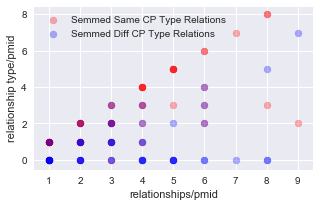

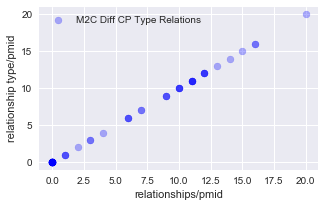

In [19]:
fig, ax = mplot.subplots(figsize=(5,3))
ax.scatter(rel_ratio_df['semmed_rels_count'],rel_ratio_df['semmed_homtype_count'],c='red',alpha=0.3, label='Semmed Same CP Type Relations')
ax.scatter(rel_ratio_df['semmed_rels_count'],rel_ratio_df['semmed_hettype_count'],c='blue',alpha=0.3, label='Semmed Diff CP Type Relations')
#ax.scatter(rel_ratio_df['M2C_cpmid_count'],rel_ratio_df['M2C_cpmid_count'],c='green',alpha=0.3, label='M2C Diff Type Relations')
mplot.xlabel("relationships/pmid")
mplot.ylabel("relationship type/pmid")
ax.legend()
ax.grid(True)

mplot.show()
fig, ax = mplot.subplots(figsize=(5,3))
mplot.scatter(rel_ratio_df['M2C_cpmid_count'],rel_ratio_df['M2C_cpmid_count'],c='blue',alpha=0.3, label='M2C Diff CP Type Relations')
mplot.legend()
mplot.grid(True)
mplot.xlabel("relationships/pmid")
mplot.ylabel("relationship type/pmid")
mplot.show()